In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
# Bank Data Analysis Project

## 📌 Objective
The objective of this project is to analyze bank customer data
and identify patterns related to marketing campaigns and
customer behavior using data analytics techniques.

In [ ]:
df.head()
df.info()
df.describe()

In [ ]:
df = pd.read_csv("Bank.csv")

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

## 🧹 Data Cleaning
Checking for missing values and inconsistencies in the dataset.

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [ ]:
df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [ ]:
df.job.value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [ ]:
df.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [ ]:
job_y = df.groupby('job')['y'].sum()
job_y

job
admin.           1352
blue-collar       638
entrepreneur      124
housemaid         106
management        328
retired           434
self-employed     149
services          323
student           275
technician        730
unemployed        144
unknown            37
Name: y, dtype: int64

In [ ]:
edu_y = df.groupby('education')['y'].sum()
edu_y

education
basic.4y                428
basic.6y                188
basic.9y                473
high.school            1031
illiterate                4
professional.course     595
university.degree      1670
unknown                 251
Name: y, dtype: int64

In [ ]:
mar_y = df.groupby('marital')['y'].sum()
mar_y

marital
divorced     476
married     2532
single      1620
unknown       12
Name: y, dtype: int64

In [ ]:
def_y = df.groupby('default')['y'].sum()
def_y

default
no         4197
unknown     443
yes           0
Name: y, dtype: int64

## 🔍 Exploratory Data Analysis
Analyzing relationships between customer attributes
and campaign outcomes.

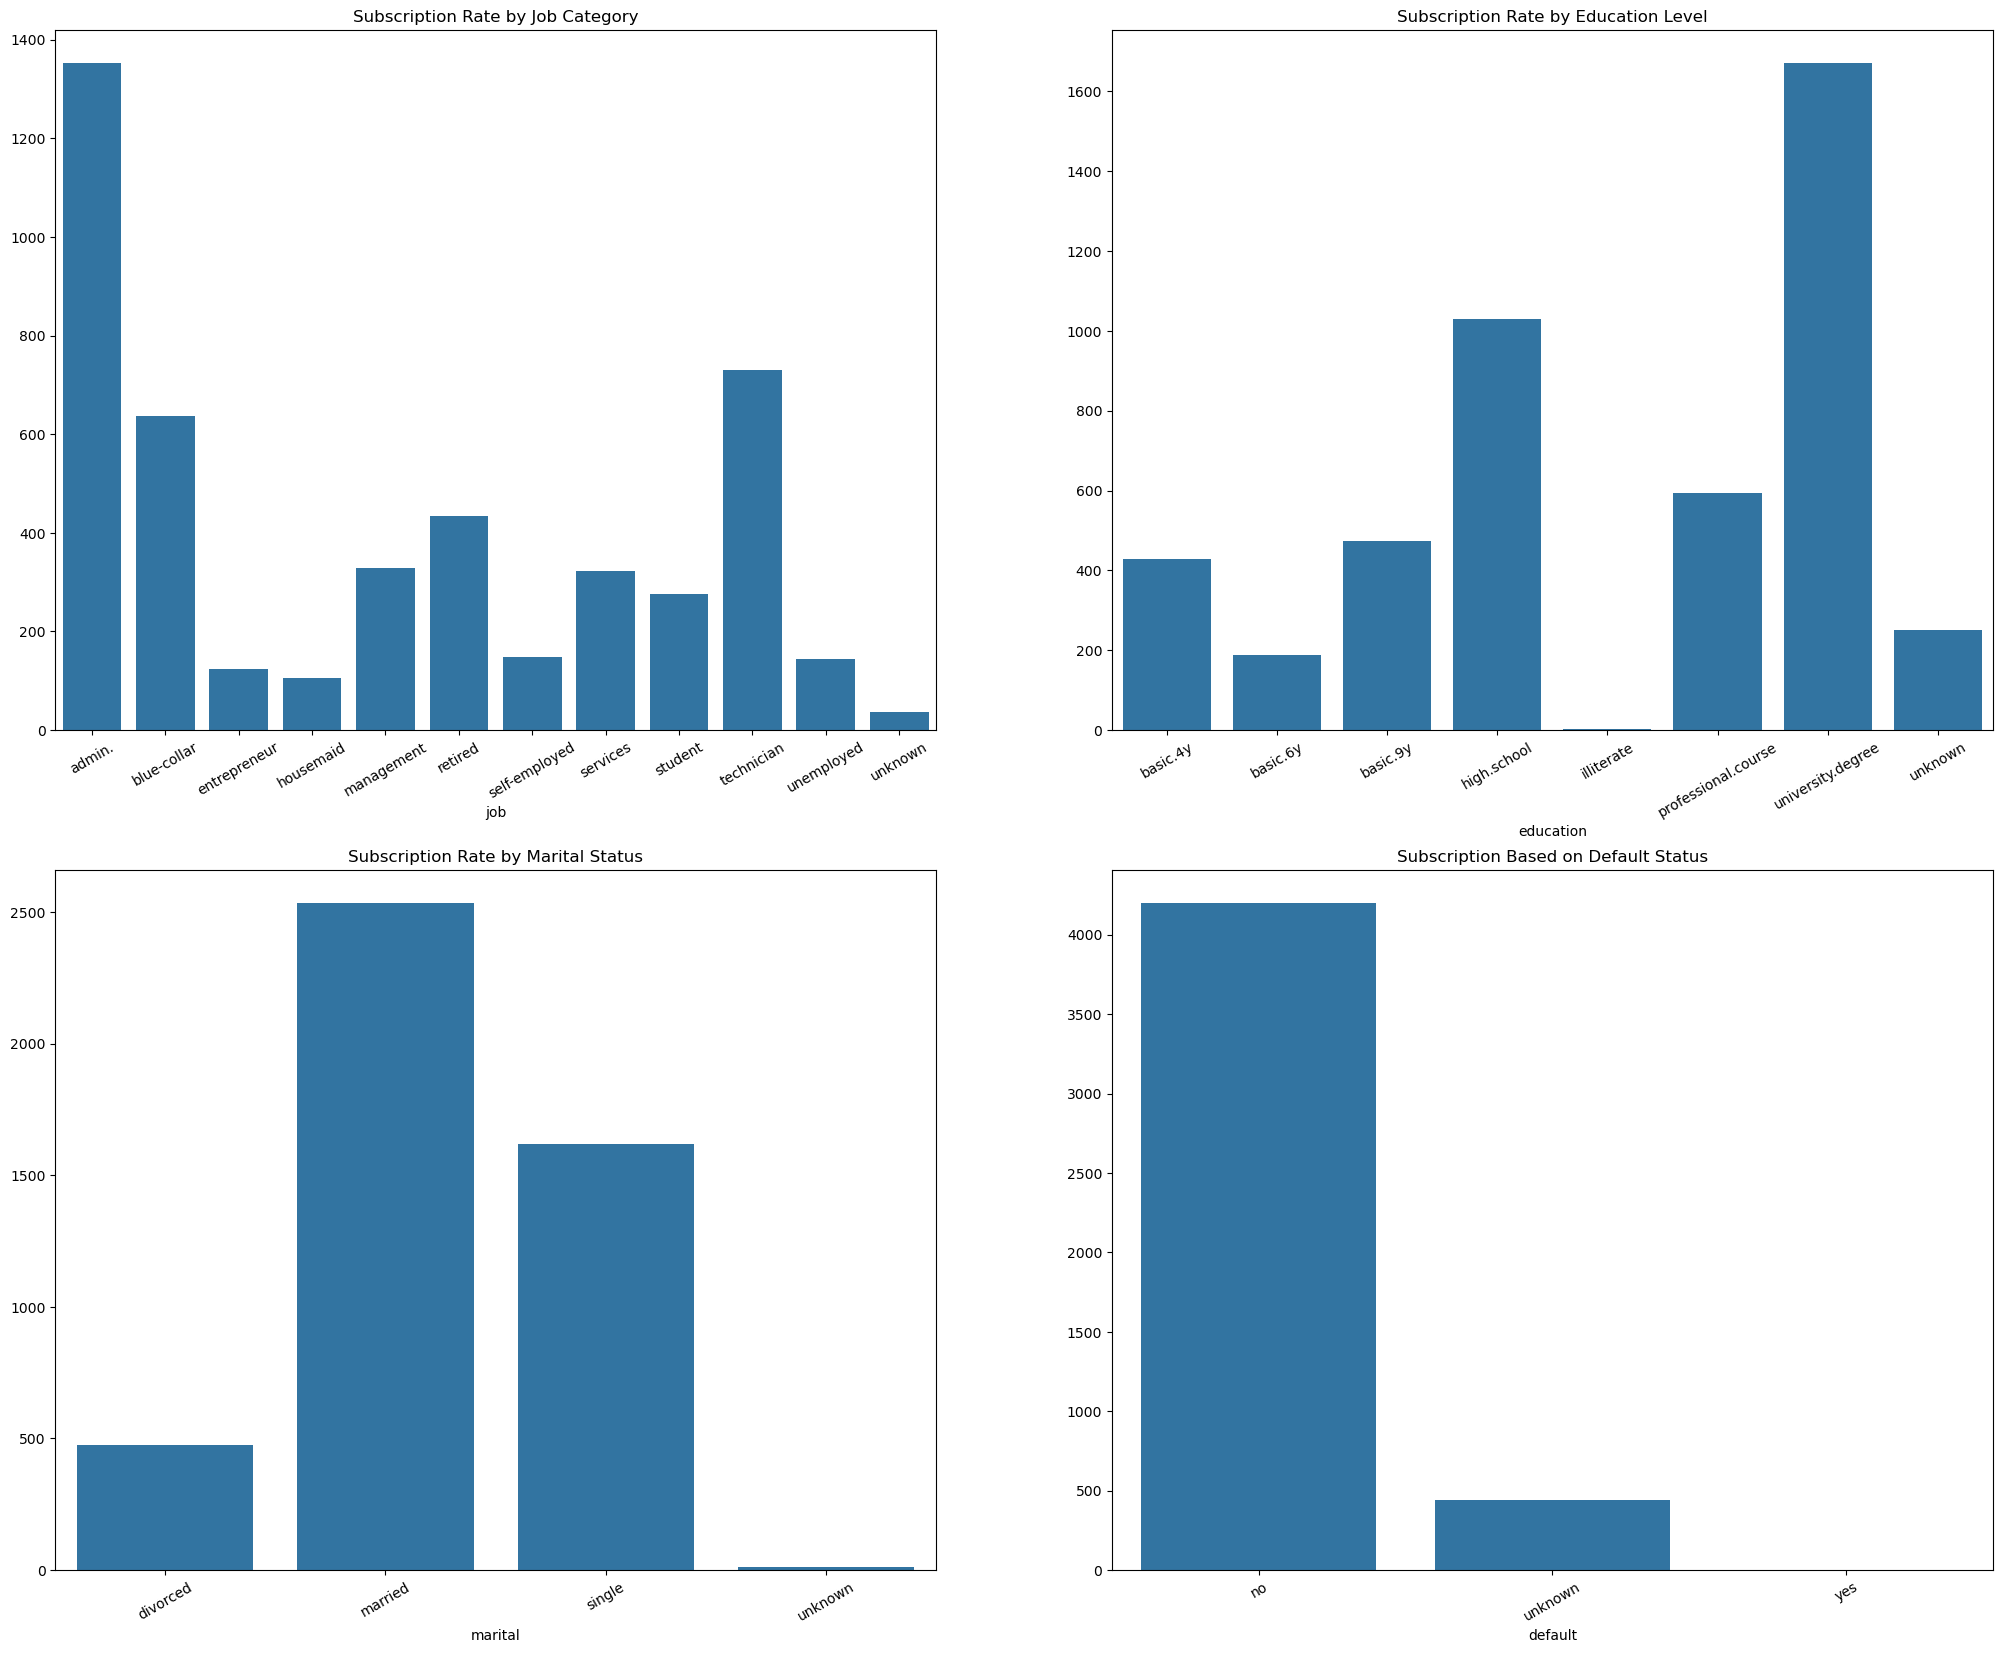

In [ ]:
fig = plt.figure(figsize=[25,20])
fig.add_subplot(221)
a=df.groupby('job')['y'].sum()
sb.barplot(x=a.index, y=a.values)
plt.title('Subscription Rate by Job Category')
plt.xticks(rotation=30)

fig.add_subplot(222)
b=df.groupby('education')['y'].sum()
sb.barplot(x=b.index, y=b.values)
plt.title('Subscription Rate by Education Level')
plt.xticks(rotation=30)

fig.add_subplot(223)
c=df.groupby('marital')['y'].sum()
plt.title('Subscription Rate by Marital Status')
sb.barplot(x=c.index, y=c.values)
plt.xticks(rotation=30)


fig.add_subplot(224)
d=df.groupby('default')['y'].sum()
plt.title('Subscription Based on Default Status')
sb.barplot(x=d.index, y=d.values)
plt.xticks(rotation=30)


plt.show()


## Observations & Insights

### 1.Subscription Rate by Job Category
Customers working in professional and management-related jobs
show higher subscription counts compared to other job categories.
This indicates that occupation plays a significant role in
subscription decisions.

### 2.Subscription Rate by Education Level
Customers with higher education levels such as university degrees
tend to subscribe more to bank products, suggesting that education
positively influences customer engagement.

### 3️.Subscription Rate by Marital Status
Married customers show a relatively higher subscription rate
compared to single and divorced customers, indicating that marital
status impacts financial decision-making.

### 4️.Subscription Based on Default Status
Customers without credit default history have a much higher
subscription rate, while customers with default history show
lower engagement with bank products.


In [ ]:
# corr_matrix=df.corr(numeric_only=True)

## Correlation Pair Plot
This pair plot visualizes the relationships between numerical
features in the dataset. It helps identify correlations,
patterns, and potential relationships between variables.

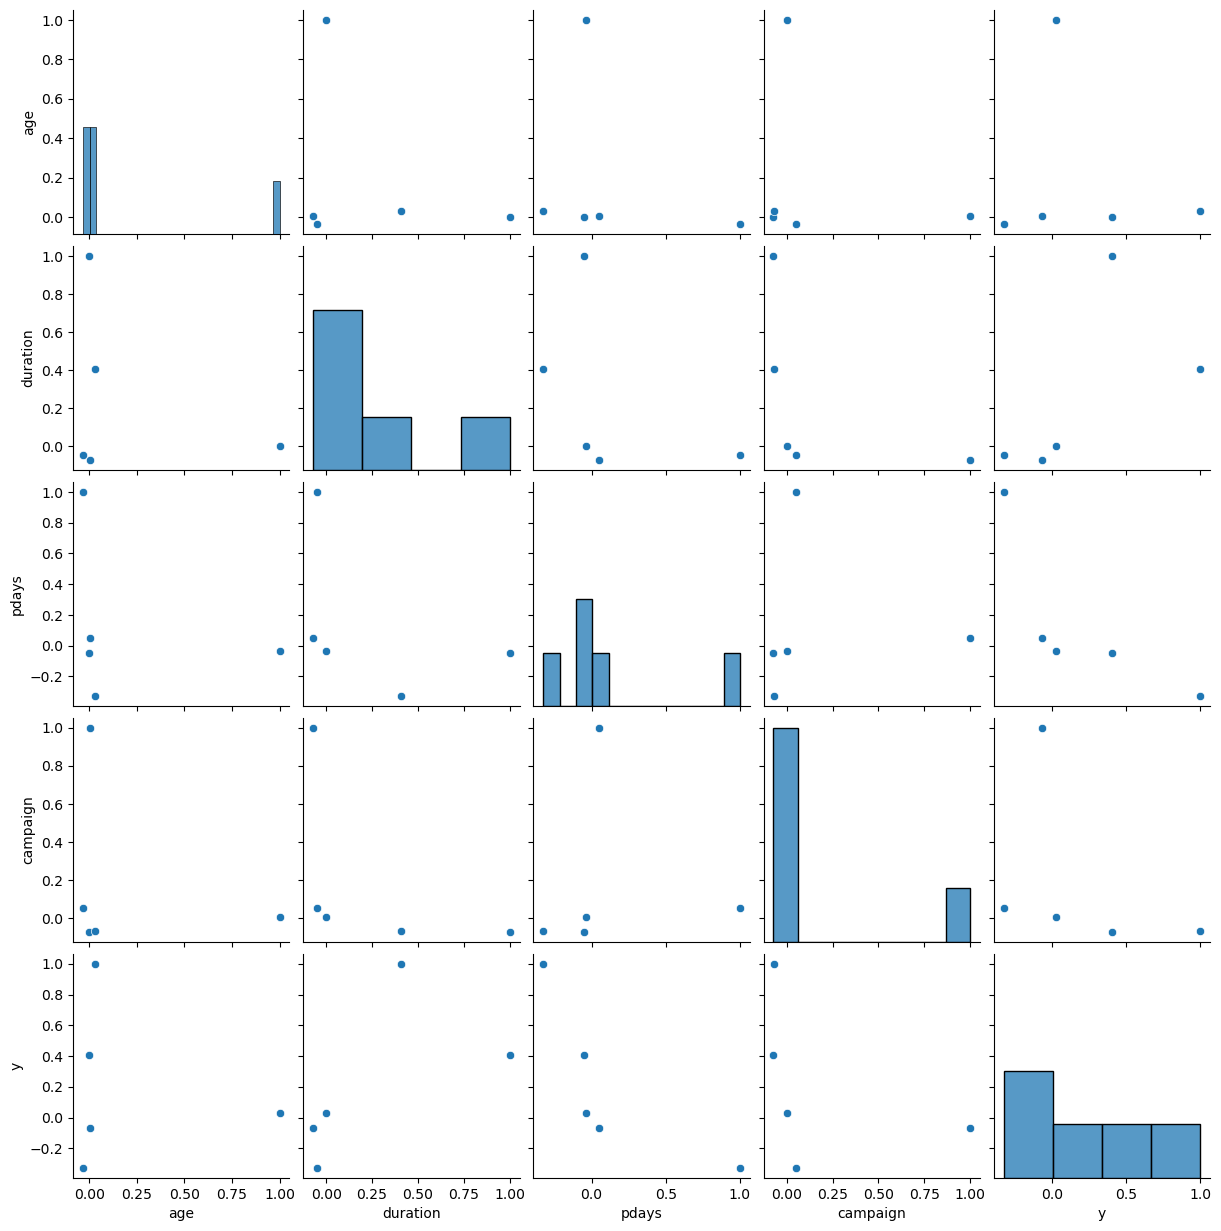

In [ ]:
sb.pairplot(corr_matrix)
plt.show()

## Observations from Pair Plot
- The diagonal plots show the distribution of individual variables.
- Scatter plots help identify positive or negative relationships
  between different features.
- Strong linear patterns indicate higher correlation between variables.
- Weak or scattered patterns suggest little or no correlation.

This visualization helps understand how different variables
interact with each other and supports further analysis.

In [ ]:
corr_matrix=df[['age','duration','pdays','campaign','y']].corr()

## Subscription Percentage Analysis
This section analyzes the percentage distribution of customer
subscriptions across different demographic attributes such as
job, marital status, and education level. Normalized values are
used to compare subscription behavior more accurately.

<Figure size 2500x2000 with 0 Axes>

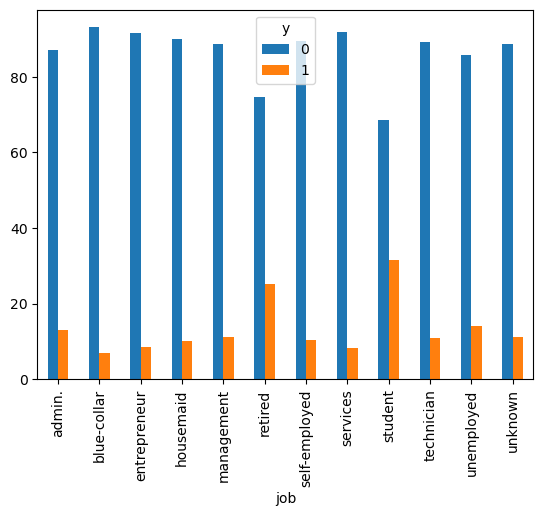

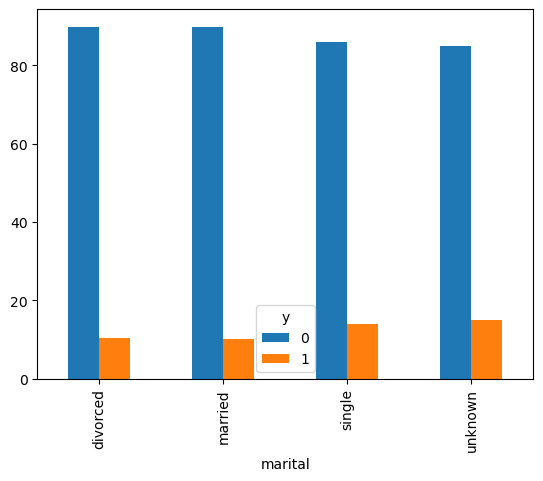

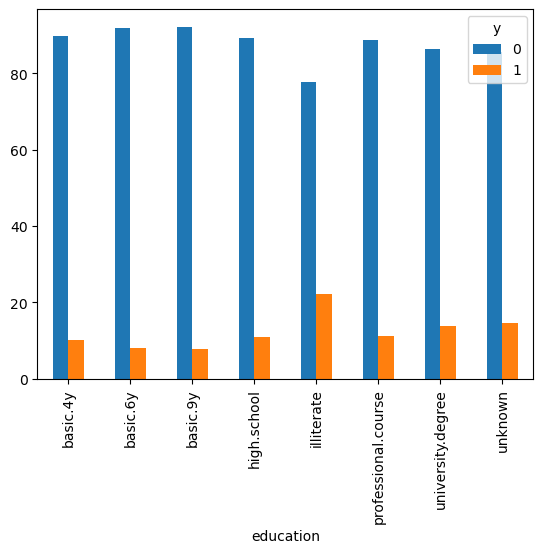

In [ ]:
fig = plt.figure(figsize=[25,20])


job_rate = df.groupby('job')['y'].value_counts(normalize=True).unstack() * 100
job_rate.plot(kind='bar')


marital_rate = df.groupby('marital')['y'].value_counts(normalize=True).unstack() * 100
marital_rate.plot(kind='bar')


edu_rate = df.groupby('education')['y'].value_counts(normalize=True).unstack() * 100
edu_rate.plot(kind='bar')

plt.show()


## 🔍 Observations & Insights

### 1️. Subscription Percentage by Job
Certain job categories show a higher percentage of successful
subscriptions, indicating that occupation significantly affects
customer response to marketing campaigns.

### 2️. Subscription Percentage by Marital Status
Married customers have a slightly higher subscription percentage
compared to single and divorced customers, suggesting differences
in financial decision-making.

### 3️. Subscription Percentage by Education Level
Customers with higher education levels demonstrate better
subscription rates, highlighting the impact of education on
customer engagement.

Overall, normalized percentage analysis provides a clearer
comparison across customer groups by removing the effect of
unequal group sizes.

### Call Duration vs Subscription Outcome
This plot analyzes how call duration differs between customers
who subscribed and those who did not.

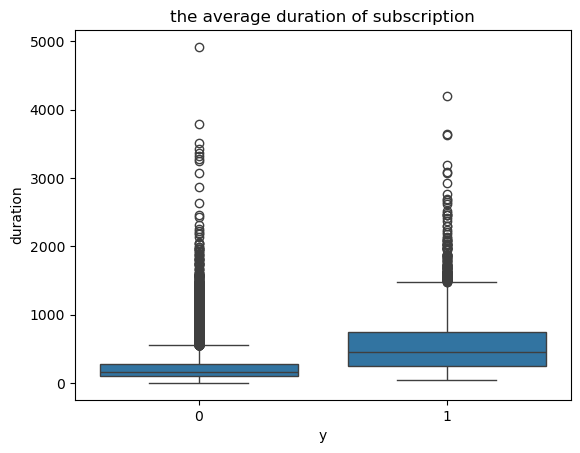

In [ ]:
sb.boxplot(x=df.y,y=df.duration)
plt.title('the average duration of subscription')
plt.show()

**Observation:**  
Customers who subscribed generally had longer call durations.
This suggests that longer interactions increase the likelihood
of successful subscription.

### Contact Type and Subscription Outcome
This visualization shows the relationship between the type of
contact used and customer subscription response.

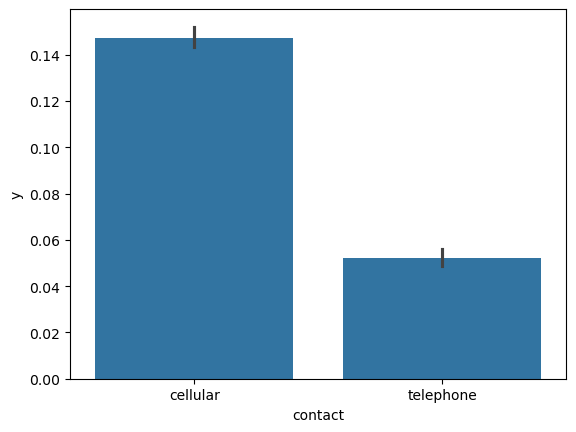

In [ ]:
sb.barplot(x=df.contact, y=df.y)
plt.show()

**Observation:**  
Certain contact methods perform better in achieving subscriptions,
indicating that communication channel selection impacts campaign success.

In [ ]:
a = df.groupby('contact')['y'].value_counts(normalize=True)
a

contact    y
cellular   0    0.852624
           1    0.147376
telephone  0    0.947687
           1    0.052313
Name: proportion, dtype: float64

In [ ]:
b=df.groupby('y')['campaign'].mean()
b

y
0    2.633085
1    2.051724
Name: campaign, dtype: float64

### Campaign Frequency vs Subscription Outcome
This plot examines how the number of contacts during a campaign
affects customer subscription behavior.

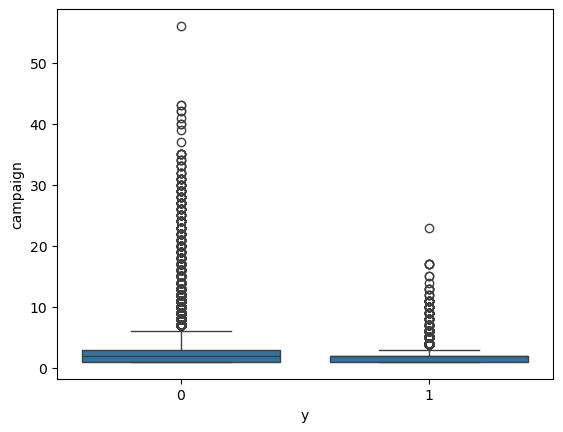

In [ ]:
sb.boxplot(x=df.y,y=df.campaign)
plt.show()

**Observation:**  
Customers contacted fewer times tend to show better subscription
outcomes, suggesting that excessive contact may reduce effectiveness.

In [ ]:
c=df.groupby('poutcome')['y'].value_counts(normalize=True).unstack()
c

y,0,1
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911678,0.088322
success,0.348871,0.651129


In [ ]:
pout_rate

y,0,1
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911678,0.088322
success,0.348871,0.651129


###  Impact of Previous Campaigns
This analysis evaluates how previous campaign outcomes and the
number of prior contacts influence current subscription rates.

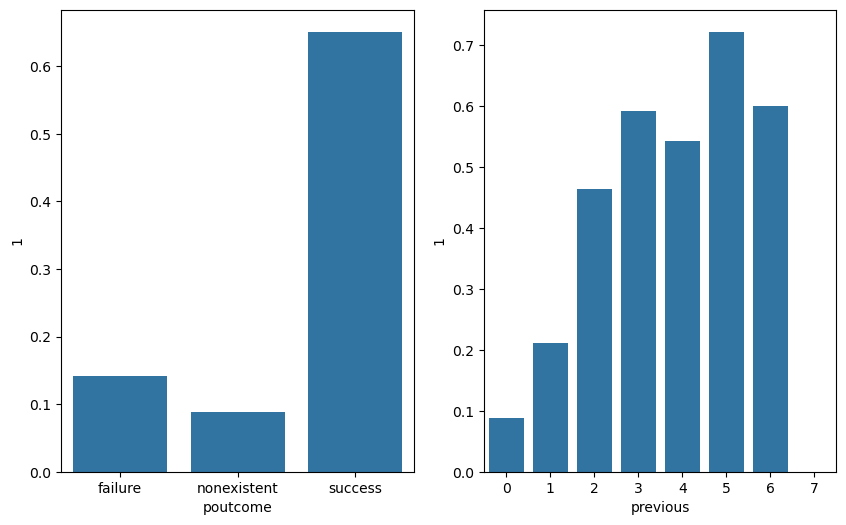

In [ ]:
fig = plt.figure(figsize=[10,6])

fig.add_subplot(121)
pout_rate = df.groupby('poutcome')['y'].value_counts(normalize=True).unstack()
sb.barplot(x=pout_rate.index,y=pout_rate[1])

fig.add_subplot(122)
pre_rate = df.groupby('previous')['y'].value_counts(normalize=True).unstack()
sb.barplot(x=pre_rate.index,y=pre_rate[1])

plt.show()


**Observations:**  
- Customers with successful outcomes in previous campaigns are
  more likely to subscribe again.
- A higher number of previous contacts can influence customer
  responsiveness, depending on prior experience.

### Monthly Subscription Trends
This visualization shows how subscription rates vary across
different months.

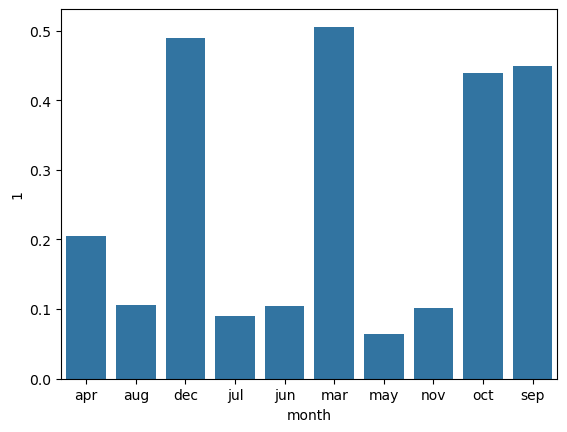

In [ ]:
month = df.groupby('month')['y'].value_counts(normalize=True).unstack()
sb.barplot(x=month.index,y=month[1])
plt.show()

**Observation:**  
Subscription rates fluctuate across months, indicating the
presence of seasonal trends in customer engagement.

### Day-wise Subscription Trends
This plot analyzes customer subscription behavior across
different days of the week.

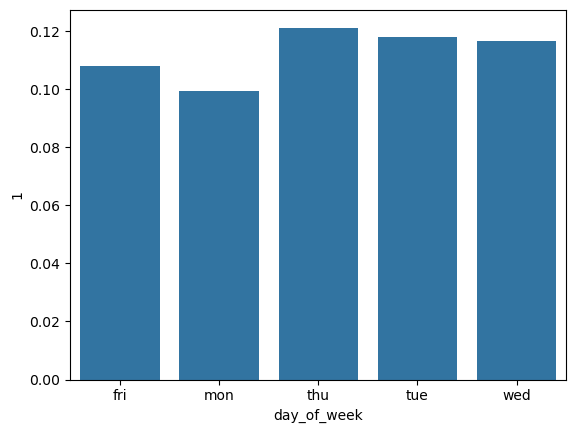

In [ ]:
d = df.groupby('day_of_week')['y'].value_counts(normalize=True).unstack()
sb.barplot(x=d.index,y=d[1])
plt.show()

**Observation:**  
Customer responsiveness varies by day of the week, suggesting
that campaign timing plays an important role in subscription success.

## Insights
- Most customers did not subscribe to the product.
- Previous campaign outcomes influence customer decisions.
- Contact history plays a role in subscription behavior.

## Conclusion
This project successfully analyzed bank customer data
using Python and data analytics techniques. The insights
can help improve marketing strategies and customer targeting.
